# Preparação de Ambiente

In [ ]:
# Conexão do Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalação de biblioteca
!pip install rasterio
import pandas as pd
import os
import glob
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Dicionario de cores da legenda
nova_linha = pd.DataFrame({"Class_ID": [0], "Level":[0], "Description":["none"], "Descricao":["none"], "Color": ["#404040"]})
legenda0 = pd.concat([pd.read_csv('/content/drive/MyDrive/MAPBIOMAS-EXPORT/codigos_legenda.csv', sep='\t', header=0), nova_linha], ignore_index=True)\
             .sort_values(by='Class_ID', ascending=True)\
             .reset_index(drop=True)
legenda1 = legenda0.drop(["Descricao", "Description", "Level"], axis=1)
legenda2 = legenda0.drop(["Description", "Level"], axis=1)\
                   .sort_values(by='Class_ID', ascending=True)\
                   .reset_index(drop=True)
color_dict = legenda0.set_index("Class_ID")["Color"].to_dict()

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 76.7 MB/s eta 0:00:00


In [ ]:
#Define funções

#descreve arquivo tiff
def descrever_tiff(tiff_path):
    """Exibe informações detalhadas sobre um arquivo TIFF geoespacial."""
    with rasterio.open(tiff_path) as dataset:
        print(f"📂 Arquivo: {tiff_path}")
        print(f"➡️ CRS: {dataset.crs}")  # Sistema de Coordenadas de Referência
        print(f"➡️ Resolução: {dataset.res[0]}, {dataset.res[1]}")  # Tamanho do pixel
        print(f"➡️ Dimensões: {dataset.width} x {dataset.height} (Largura x Altura)")
        print(f"➡️ Quantidade de bandas: {dataset.count}")
        print(f"➡️ Extensão: {dataset.bounds}")  # Bounding box
        print(f"➡️ Tipo de dado das bandas: {[dataset.dtypes[i] for i in range(dataset.count)]}")
        print(f"➡️ Perfil do dataset: {dataset.profile}")  # Metadados gerais
        print(f"➡️ Transformação Afim (GeoTransform): {dataset.transform}")  # Matriz de transformação espacial
        print(f"➡️ Valor NoData: {dataset.nodata}")  # Valor que representa ausência de dados
        print(f"➡️ Metadata: {dataset.meta}")  # Metadados completos

        # # Verificar estatísticas básicas por banda
        # for i in range(1, dataset.count + 1):
        #     band = dataset.read(i)
        #     print(f"📊 Estatísticas da Banda {i}:")
        #     print(f"   🔹 Valor mínimo: {band.min()}")
        #     print(f"   🔹 Valor máximo: {band.max()}")
        #     print(f"   🔹 Média: {band.mean():.2f}")
        #     print(f"   🔹 Desvio padrão: {band.std():.2f}")

#visualiza amostra do mapa
def visualizar_tiff_reduzido(file_path, fator_reducao=10, cmap="viridis", canal=18):
    """
    Abre um arquivo TIFF e exibe uma versão reduzida da primeira banda.

    Parâmetros:
    - file_path (str): Caminho do arquivo TIFF.
    - fator_reducao (int): Fator pelo qual a resolução será reduzida. Padrão é 10.
    - cmap (str): Mapa de cores para exibição. Padrão é "gray".
    """
    with rasterio.open(file_path) as src:
        # Reduz a resolução da primeira banda
        small_window = src.read(canal, out_shape=(src.height // fator_reducao, src.width // fator_reducao))

        # Exibe a imagem reduzida
        plt.figure(figsize=(10, 6))
        plt.imshow(small_window, cmap=cmap)
        # plt.colorbar()
        plt.title(f"Visualização rápida do TIFF (reduzido {fator_reducao}x)")
        plt.show()

# # Exemplo de uso:
# file_path = "/content/drive/MyDrive/EarthEngineExports/Sentinel2_With_Goias_Channel.tif"
# visualizar_tiff_reduzido(file_path, fator_reducao=10, cmap="viridis")


In [ ]:
print(legenda0.head(3))
print(legenda1.head(3))
print(legenda2.head(3))
# Caminho para a pasta no Google Drive e arquivos TIFF
folder_path = "/content/drive/MyDrive/MAPBIOMAS-EXPORT"
tiff_files = glob.glob(os.path.join(folder_path, "*.tif"))
print("Arquivos encontrados:")
for file in tiff_files:
    print(file)

   Class_ID  Level       Description           Descricao    Color
0         0      0              none                none  #404040
1         1      1            Forest            Floresta  #32a65e
2         3      2  Forest Formation  Formação Florestal  #1f8d49
   Class_ID    Color
0         0  #404040
1         1  #32a65e
2         3  #1f8d49
   Class_ID           Descricao    Color
0         0                none  #404040
1         1            Floresta  #32a65e
2         3  Formação Florestal  #1f8d49
Arquivos encontrados:
/content/drive/MyDrive/MAPBIOMAS-EXPORT/mapbiomas-brazil-collection-90-2023-0000000000-0000000000.tif
/content/drive/MyDrive/MAPBIOMAS-EXPORT/df.tif
/content/drive/MyDrive/MAPBIOMAS-EXPORT/goias.tif
/content/drive/MyDrive/MAPBIOMAS-EXPORT/df_goias_combined.tif
/content/drive/MyDrive/MAPBIOMAS-EXPORT/Landsat8_AOI-0000000000-0000000000.tif
/content/drive/MyDrive/MAPBIOMAS-EXPORT/Landsat8_AOI-0000000000-0000008192.tif
/content/drive/MyDrive/MAPBIOMAS-EXPORT/Landsat

In [ ]:
print(legenda2.head(30))
base = "/content/drive/MyDrive/Unb/Plantio_direto/TIFF_Indices.tif"

    Class_ID                       Descricao    Color
0          0                            none  #404040
1          1                        Floresta  #32a65e
2          3              Formação Florestal  #1f8d49
3          4               Formação Savânica  #7dc975
4          5                          Mangue  #04381d
5          6               Floresta Alagável  #026975
6          9                    Silvicultura  #7a5900
7         10  Vegetação Herbácea e Arbustiva  #ad975a
8         11  Campo Alagado e Área Pantanosa  #519799
9         12              Formação Campestre  #d6bc74
10        14                    Agropecuária  #FFFFB2
11        15                        Pastagem  #edde8e
12        18                     Agricultura  #E974ED
13        19              Lavoura Temporária  #C27BA0
14        20                            Cana  #db7093
15        21                 Mosaico de Usos  #ffefc3
16        22               Área não Vegetada  #d4271e
17        23             Pra

In [ ]:
# Caminho para o arquivo .tif
origem = base

# Abrir o arquivo TIFF com rasterio
with rasterio.open(origem) as src:
    # Ler o primeiro canal (banda)
    band1 = src.read(18)


# Lista de class_id que aparecem no raster (band1)
unique_class_ids = sorted(set(band1.flatten()))  # Obtém todos os IDs únicos do raster

# Gerar a paleta de cores, com tons de cinza para IDs que não estão no color_dict
palette = [
    color_dict[class_id] if class_id in color_dict else f'#404040'  # Tons de cinza
    for class_id in unique_class_ids
]

# Criar o colormap
cmap3 = ListedColormap(palette)

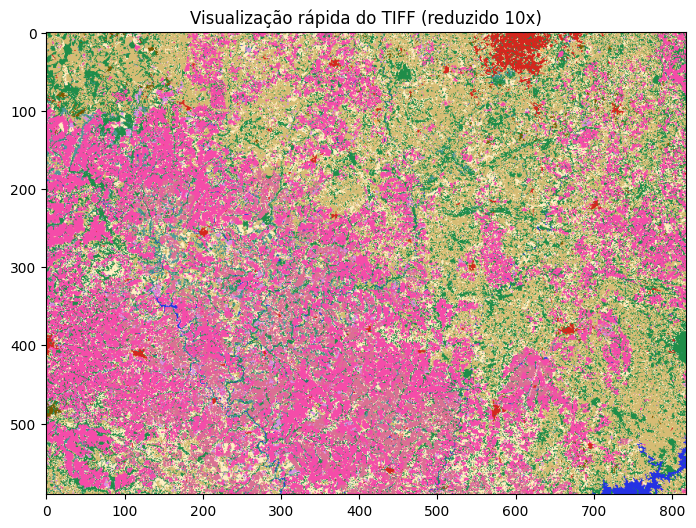

📂 Arquivo: /content/drive/MyDrive/TIFF_Com_Nova_Banda.tif
➡️ CRS: EPSG:4326
➡️ Resolução: 0.00026949458523585647, 0.00026949458523585647
➡️ Dimensões: 8192 x 5918 (Largura x Altura)
➡️ Quantidade de bandas: 18
➡️ Extensão: BoundingBox(left=-50.91695946153654, bottom=-18.298951832099892, right=-48.709259819284405, top=-16.704082876674093)
➡️ Tipo de dado das bandas: ['float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32']
➡️ Perfil do dataset: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 8192, 'height': 5918, 'count': 18, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EP

In [ ]:
neo = "/content/drive/MyDrive/TIFF_Com_Nova_Banda.tif"
visualizar_tiff_reduzido(neo, fator_reducao=10, cmap=cmap3)
descrever_tiff(neo)

In [ ]:
import rasterio
import numpy as np

# Caminho dos arquivos TIFF
tiff_antes = '/content/drive/MyDrive/MAPBIOMAS-EXPORT/Landsat8_AOI-0000008192-0000000000.tif'  # TIFF original
tiff_depois = "/content/drive/MyDrive/TIFF_Com_Nova_Banda.tif"  # TIFF após o merge

# Carregar a banda do Class_ID antes do merge
with rasterio.open(tiff_antes) as dataset:
    class_id_antes = dataset.read(1)  # Banda 1 (ajuste se necessário)
    unique_antes = np.unique(class_id_antes)  # Valores únicos

# Carregar a banda do Class_ID após o merge
with rasterio.open(tiff_depois) as dataset:
    class_id_depois = dataset.read(1)  # Banda 1 (ajuste se necessário)
    unique_depois = np.unique(class_id_depois)  # Valores únicos

# Comparar os valores únicos antes e depois
print("Valores únicos antes do merge:", unique_antes)
print("Valores únicos depois do merge:", unique_depois)

# Conferir se há diferenças
if np.array_equal(unique_antes, unique_depois):
    print("✅ Os Class_IDs permanecem inalterados após o merge.")
else:
    print("⚠️ Atenção! Houve alteração nos Class_IDs.")
    print("Valores que existiam antes, mas não existem mais:", set(unique_antes) - set(unique_depois))
    print("Novos valores que surgiram após o merge:", set(unique_depois) - set(unique_antes))


Valores únicos antes do merge: [0.09725507 0.09770145 0.09772427 ... 0.47922117 0.48474318        nan]
Valores únicos depois do merge: [0.09725507 0.09770145 0.09772427 ... 0.47922117 0.48474318        nan]
⚠️ Atenção! Houve alteração nos Class_IDs.
Valores que existiam antes, mas não existem mais: {nan}
Novos valores que surgiram após o merge: {nan}


In [ ]:
tiff_path = quadrado

with rasterio.open(tiff_path) as dataset:
    # Tenta acessar descrições das bandas
    band_names = dataset.descriptions

    # Exibe os nomes (se existirem)
    for i, name in enumerate(band_names, start=1):
        print(f"Banda {i}: {name if name else 'Sem nome definido'}")


Banda 1: B1
Banda 2: B2
Banda 3: B3
Banda 4: B4
Banda 5: B5
Banda 6: B6
Banda 7: B7
Banda 8: B8
Banda 9: B9
Banda 10: B10
Banda 11: B11
Banda 12: QA_PIXEL
Banda 13: QA_RADSAT
Banda 14: SAA
Banda 15: SZA
Banda 16: VAA
Banda 17: VZA


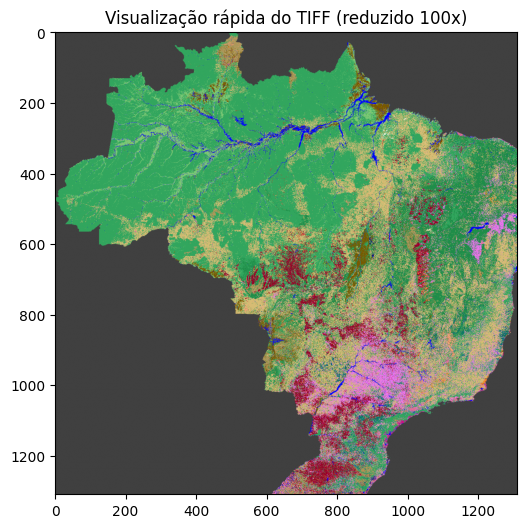

📂 Arquivo: /content/drive/MyDrive/MAPBIOMAS-EXPORT/mapbiomas-brazil-collection-90-2023-0000000000-0000000000.tif
➡️ CRS: EPSG:4326
➡️ Resolução: 0.0002694945852358564, 0.0002694945852358564
➡️ Dimensões: 131072 x 131072 (Largura x Altura)
➡️ Quantidade de bandas: 1
➡️ Extensão: BoundingBox(left=-73.9905468602601, bottom=-30.05134119965035, right=-38.667352584225924, top=5.271853076383825)
➡️ Tipo de dado das bandas: ['uint8']
➡️ Perfil do dataset: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 131072, 'height': 131072, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0002694945852358564, 0.0, -73.9905468602601,
       0.0, -0.0002694945852358564, 5.271853076383825

In [ ]:
brazil = "/content/drive/MyDrive/MAPBIOMAS-EXPORT/mapbiomas-brazil-collection-90-2023-0000000000-0000000000.tif"
visualizar_tiff_reduzido(brazil, fator_reducao=100, canal=1, cmap=cmap2)
descrever_tiff(brazil)

In [ ]:
# Caminhos dos arquivos
primeiro_tiff = quadrado
segundo_tiff = "/content/drive/MyDrive/MAPBIOMAS-EXPORT/mapbiomas-brazil-collection-90-2023-0000000000-0000000000.tif"
tiff_saida = "/content/drive/MyDrive/TIFF_Com_Nova_Banda.tif"

# 1️⃣ Abrir o primeiro TIFF para obter as propriedades originais
with rasterio.open(primeiro_tiff) as src1:
    meta = src1.meta.copy()  # Copiar metadados
    meta.update(count=18)  # Atualizar para 18 bandas

    # Ler todas as bandas do primeiro TIFF
    bandas = [src1.read(i + 1) for i in range(src1.count)]

    # Extensão do primeiro TIFF
    bounds1 = src1.bounds
    transform1 = src1.transform
    width1, height1 = src1.width, src1.height

# 2️⃣ Abrir o segundo TIFF para extração de dados
with rasterio.open(segundo_tiff) as src2:
    # Reprojetar para coincidir com o primeiro TIFF
    window = rasterio.windows.from_bounds(*bounds1, transform=src2.transform)
    data_segundo = src2.read(1, window=window, out_shape=(height1, width1), resampling=Resampling.nearest)

# 3️⃣ Criar o novo TIFF com 18 bandas
with rasterio.open(tiff_saida, 'w', **meta) as dst:
    # Escrever as 17 bandas originais
    for i, banda in enumerate(bandas):
        dst.write(banda, i + 1)

    # Escrever a 18ª banda (dados do segundo TIFF)
    dst.write(data_segundo, 18)

print("✅ Arquivo TIFF com 18 bandas salvo com sucesso:", tiff_saida)


✅ Arquivo TIFF com 18 bandas salvo com sucesso: /content/drive/MyDrive/TIFF_Com_Nova_Banda.tif


Número de bandas: 18
Red: min=nan, max=nan
Green: min=nan, max=nan
Blue: min=nan, max=nan


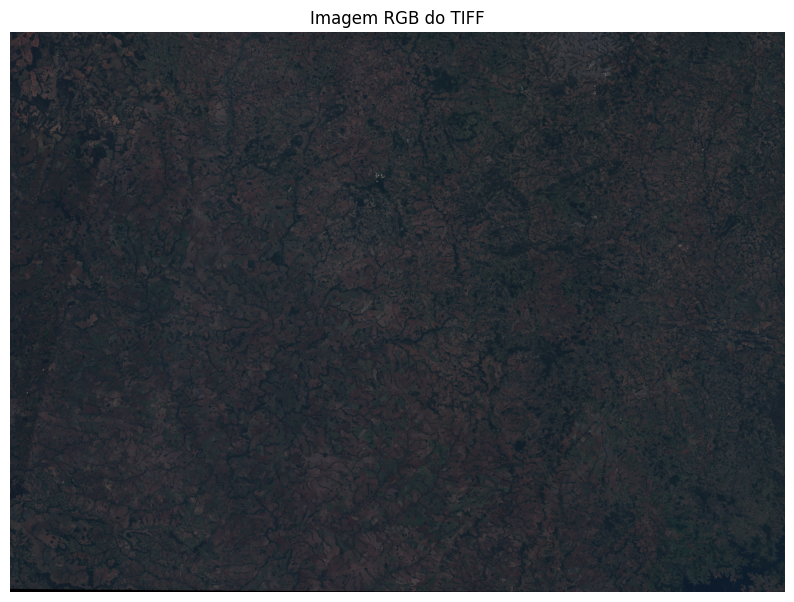

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Caminho do arquivo TIFF
tiff_path = "/content/drive/MyDrive/TIFF_Com_Nova_Banda.tif"

# Abrir o arquivo TIFF
with rasterio.open(tiff_path) as dataset:
    # Verificar quais bandas estão disponíveis
    print(f"Número de bandas: {dataset.count}")

    # Ler as bandas RGB (B4 - Red, B3 - Green, B2 - Blue)
    red = dataset.read(4).astype(np.float32)  # Banda 4 (vermelho)
    green = dataset.read(3).astype(np.float32)  # Banda 3 (verde)
    blue = dataset.read(2).astype(np.float32)  # Banda 2 (azul)

    # Verificar estatísticas básicas
    print(f"Red: min={red.min()}, max={red.max()}")
    print(f"Green: min={green.min()}, max={green.max()}")
    print(f"Blue: min={blue.min()}, max={blue.max()}")

# Normalizar evitando divisões por zero
def normalize_band(band):
    band = np.nan_to_num(band)  # Substituir NaN por 0
    band_min, band_max = band.min(), band.max()
    return (band - band_min) / (band_max - band_min + 1e-8)  # Evitar divisão por zero

red = normalize_band(red)
green = normalize_band(green)
blue = normalize_band(blue)

# Criar a imagem RGB
rgb_image = np.stack([red, green, blue], axis=-1)

# Exibir a imagem
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis("off")  # Ocultar os eixos
plt.title("Imagem RGB do TIFF")
plt.show()


In [ ]:
with rasterio.open(bands18) as dataset:
    # Tenta acessar descrições das bandas
    band_names = dataset.descriptions

    # Exibe os nomes (se existirem)
    for i, name in enumerate(band_names, start=1):
        print(f"Banda {i}: {name if name else 'Sem nome definido'}")

Banda 1: Sem nome definido
Banda 2: Sem nome definido
Banda 3: Sem nome definido
Banda 4: Sem nome definido
Banda 5: Sem nome definido
Banda 6: Sem nome definido
Banda 7: Sem nome definido
Banda 8: Sem nome definido
Banda 9: Sem nome definido
Banda 10: Sem nome definido
Banda 11: Sem nome definido
Banda 12: Sem nome definido
Banda 13: Sem nome definido
Banda 14: Sem nome definido
Banda 15: Sem nome definido
Banda 16: Sem nome definido
Banda 17: Sem nome definido
Banda 18: Sem nome definido


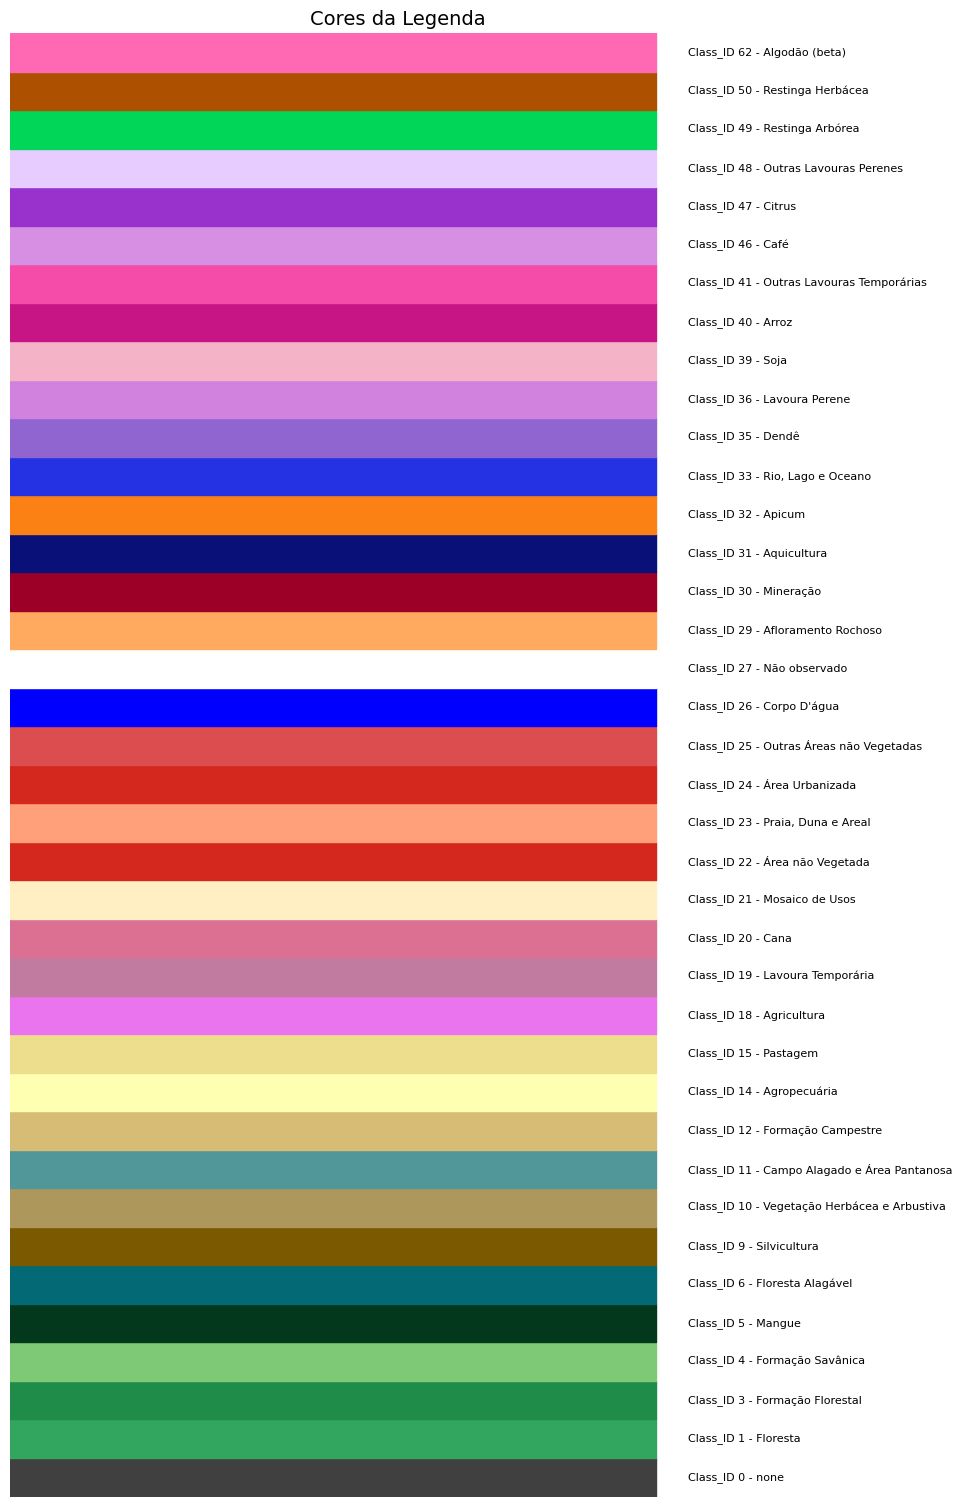

In [ ]:
# Obter a lista de cores diretamente do DataFrame legenda1
colors = legenda2['Color'].tolist()
color_names = legenda2['Class_ID'].astype(str).tolist()  # Use o Class_ID como nome ou outro atributo
color_descript = legenda2['Descricao'].astype(str).tolist()  # Use o Class_ID como nome ou outro atributo

# Plotando as cores
plt.figure(figsize=(10, len(colors) // 2))  # Ajusta o tamanho dependendo da quantidade de cores
for i, color in enumerate(colors):
    plt.fill_between([0, 1], i, i+1, color=color)
    # plt.text(1.05, i+0.5, f'{color} - Class_ID {color_names[i]} - {color_descript[i]}', va='center', ha='left', fontsize=8)
    plt.text(1.05, i+0.5, f'Class_ID {color_names[i]} - {color_descript[i]}', va='center', ha='left', fontsize=8)

plt.xlim(0, 1.2)
plt.ylim(0, len(colors))
plt.axis('off')
plt.title("Cores da Legenda", fontsize=14)
plt.show()


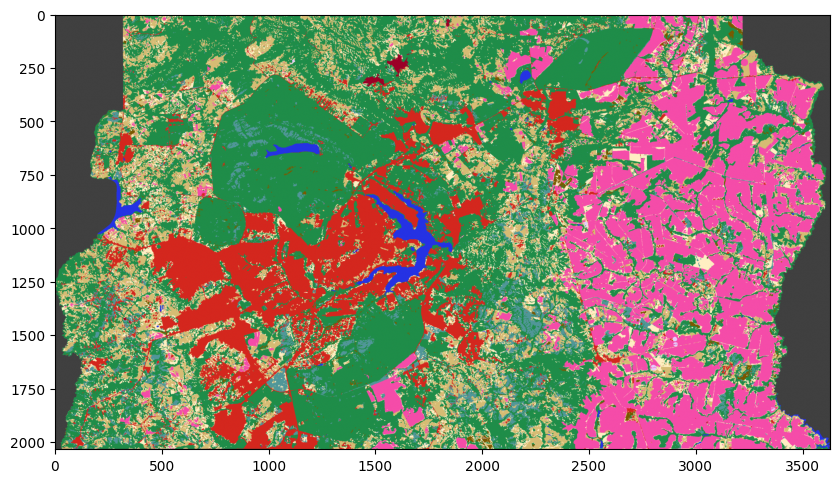

In [ ]:
# Lista de class_id que aparecem no raster (band1)
unique_class_ids = sorted(set(band1.flatten()))  # Obtém todos os IDs únicos do raster

# Gerar a paleta de cores, com tons de cinza para IDs que não estão no color_dict
palette = [
    color_dict[class_id] if class_id in color_dict else f'#{class_id:02X}{class_id:02X}{class_id:02X}'  # Tons de cinza
    for class_id in unique_class_ids
]

# Criar o colormap
cmap = ListedColormap(palette)

# Plotar o raster com as cores
plt.figure(figsize=(10, 8))
# plt.figure(figsize=(20, 16))
plt.imshow(band1, cmap=cmap, vmin=min(unique_class_ids), vmax=max(unique_class_ids))
# plt.colorbar(label='Classificação')
# plt.title('Classificação com Paleta de Cores')
# plt.xlabel('Colunas')
# plt.ylabel('Linhas')
plt.show()


### Gera **INDICES**

In [ ]:
# Caminho do arquivo de entrada e saída
input_tiff_path = "/content/drive/MyDrive/TIFF_Com_Nova_Banda.tif"
output_tiff_path = "/content/drive/MyDrive/TIFF_Indices.tif"

# Abrindo o arquivo TIFF original
with rasterio.open(input_tiff_path) as src:
    profile = src.profile.copy()

    # Lendo as bandas necessárias para os cálculos
    B2 = src.read(2).astype(np.float32)  # Banda 2 (Azul)
    B3 = src.read(3).astype(np.float32)  # Banda 3 (Verde)
    B4 = src.read(4).astype(np.float32)  # Banda 4 (Vermelho)
    B5 = src.read(5).astype(np.float32)  # Banda 5 (NIR)
    B6 = src.read(6).astype(np.float32)  # Banda 6 (SWIR1)

    # Evitando divisão por zero
    eps = np.finfo(np.float32).eps

    # Cálculo dos índices espectrais
    NDVI = (B5 - B4) / (B5 + B4 + eps)
    EVI = 2.5 * (B5 - B4) / (B5 + 6 * B4 - 7.5 * B2 + 1 + eps)
    NDWI = (B3 - B5) / (B3 + B5 + eps)
    NDSI = (B3 - B6) / (B3 + B6 + eps)
    MSAVI = (2 * B5 + 1 - np.sqrt((2 * B5 + 1) ** 2 - 8 * (B5 - B4))) / 2

    # Atualizando o perfil para incluir 5 novas bandas
    profile.update(count=src.count + 5, dtype='float32')

    # Criando um novo arquivo TIFF com as bandas originais e os índices adicionados
    with rasterio.open(output_tiff_path, 'w', **profile) as dst:
        # Copiando as bandas originais
        for i in range(1, src.count + 1):
            dst.write(src.read(i), i)

        # Adicionando as novas bandas
        dst.write(NDVI, src.count + 1)  # Banda 19
        dst.write(EVI, src.count + 2)   # Banda 20
        dst.write(NDWI, src.count + 3)  # Banda 21
        dst.write(NDSI, src.count + 4)  # Banda 22
        dst.write(MSAVI, src.count + 5) # Banda 23

print(f"Arquivo salvo com sucesso: {output_tiff_path}")


Arquivo salvo com sucesso: /content/drive/MyDrive/TIFF_Indices.tif


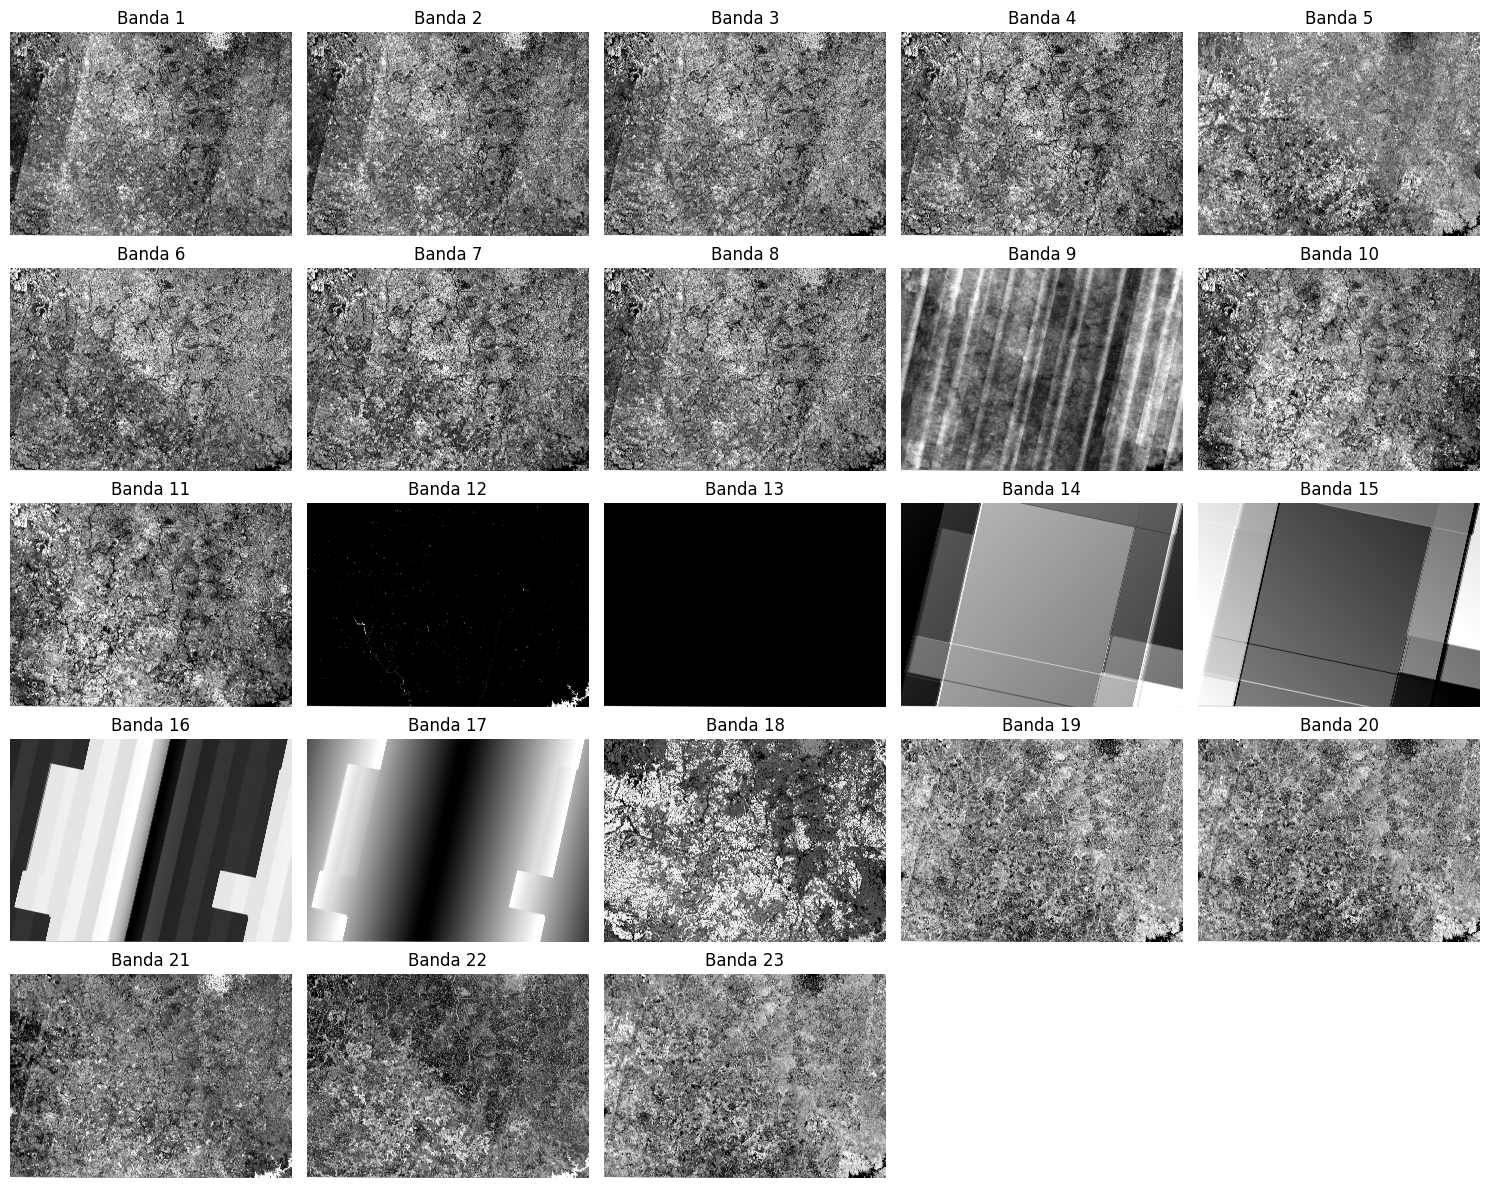

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Caminho do arquivo TIFF
tiff_path = "/content/drive/MyDrive/TIFF_Indices.tif"

# Abrindo o arquivo TIFF
with rasterio.open(tiff_path) as src:
    num_bands = src.count  # Quantidade de bandas
    fig, axes = plt.subplots(nrows=(num_bands // 5) + 1, ncols=5, figsize=(15, (num_bands // 5) * 3))

    for i in range(num_bands):
        band = src.read(i + 1)  # Lendo a banda (começa do 1)

        # Normalizando para visualização
        band = band.astype(np.float32)
        band_min, band_max = np.nanpercentile(band, [2, 98])  # Removendo outliers
        band = np.clip((band - band_min) / (band_max - band_min + 1e-6), 0, 1)

        # Selecionando eixo correto na grade
        ax = axes[i // 5, i % 5] if num_bands > 5 else axes[i]
        ax.imshow(band, cmap='gray')
        ax.set_title(f"Banda {i+1}")
        ax.axis("off")

    # Removendo eixos vazios, se houver
    for j in range(i+1, len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()


### Inclui descrição

In [ ]:
import rasterio

# Caminho do arquivo TIFF
tiff_path = "/content/drive/MyDrive/TIFF_Indices.tif"

# Lista das descrições das bandas
band_descriptions = [
    "B1 - Coastal/Aerosol",
    "B2 - Azul",
    "B3 - Verde",
    "B4 - Vermelho",
    "B5 - NIR (Infravermelho próximo)",
    "B6 - SWIR1 (Infravermelho de onda curta 1)",
    "B7 - SWIR2 (Infravermelho de onda curta 2)",
    "B8 - Pan (Pancromática)",
    "B9 - Cirrus",
    "B10 - TIR1 (Infravermelho térmico 1)",
    "B11 - TIR2 (Infravermelho térmico 2)",
    "QA_PIXEL - Qualidade do pixel",
    "QA_RADSAT - Saturação radiométrica",
    "SAA - Ângulo azimutal do sol",
    "SZA - Ângulo zenital do sol",
    "VAA - Ângulo azimutal do sensor",
    "VZA - Ângulo zenital do sensor",
    "LULC Label - Classificação do uso do solo",
    "NDVI - Índice de vegetação por diferença normalizada",
    "EVI - Índice de vegetação melhorado",
    "NDWI - Índice de água por diferença normalizada",
    "NDSI - Índice de neve por diferença normalizada",
    "MSAVI - Índice de vegetação ajustado para solo"
]

# Abrindo o TIFF no modo de atualização (write)
with rasterio.open(tiff_path, "r+") as dataset:
    dataset.descriptions = tuple(band_descriptions)
    print("Descrições das bandas adicionadas com sucesso!")


Descrições das bandas adicionadas com sucesso!


In [ ]:
tiff_path = output_tiff_path

with rasterio.open(tiff_path) as dataset:
    # Tenta acessar descrições das bandas
    band_names = dataset.descriptions

    # Exibe os nomes (se existirem)
    for i, name in enumerate(band_names, start=1):
        print(f"Banda {i}: {name if name else 'Sem nome definido'}")


Banda 1: B1 - Coastal/Aerosol
Banda 2: B2 - Azul
Banda 3: B3 - Verde
Banda 4: B4 - Vermelho
Banda 5: B5 - NIR (Infravermelho próximo)
Banda 6: B6 - SWIR1 (Infravermelho de onda curta 1)
Banda 7: B7 - SWIR2 (Infravermelho de onda curta 2)
Banda 8: B8 - Pan (Pancromática)
Banda 9: B9 - Cirrus
Banda 10: B10 - TIR1 (Infravermelho térmico 1)
Banda 11: B11 - TIR2 (Infravermelho térmico 2)
Banda 12: QA_PIXEL - Qualidade do pixel
Banda 13: QA_RADSAT - Saturação radiométrica
Banda 14: SAA - Ângulo azimutal do sol
Banda 15: SZA - Ângulo zenital do sol
Banda 16: VAA - Ângulo azimutal do sensor
Banda 17: VZA - Ângulo zenital do sensor
Banda 18: LULC Label - Classificação do uso do solo
Banda 19: NDVI - Índice de vegetação por diferença normalizada
Banda 20: EVI - Índice de vegetação melhorado
Banda 21: NDWI - Índice de água por diferença normalizada
Banda 22: NDSI - Índice de neve por diferença normalizada
Banda 23: MSAVI - Índice de vegetação ajustado para solo
